# Spam email classification using Naive Bayes, SVC and Random Forest

> Here we will walk through the stemming and lemmatization procedure for NLP.
> We will also implement NB classifier as well SVC and Random Forest Classifier to detect spam emails

In [189]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import re
from nltk.tokenize import word_tokenize as wt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [190]:
spam = pd.read_csv('spam.csv',  encoding='latin-1')
spam.head(10)

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN        NaN  
7        NaN        NaN  
8        NaN        NaN  
9        NaN        NaN

In [191]:
spam = spam.filter(['v1','v2'], axis=1)
spam.columns = ['label', 'text']
spam

label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [134]:
spam_data = spam[spam['label'] == 'spam']
real_data = spam[spam['label'] == 'ham']

# Let's stem and then lemmatize the bag of words. According to Stanford NLP Group, 
# "Stemming usually refers to a crude heuristic process that chops off the ends of 
# words in the hope of achieving this goal correctly most of the time, and often includes 
# the removal of derivational affixes. Lemmatization usually refers to doing things 
# properly with the use of a vocabulary and morphological analysis of words, normally 
# aiming to remove inflectional endings only and to return the base or dictionary 
# form of a word, which is known as the lemma."

# Here the stemming is applied to all data, spam data and real data separately

In [137]:
all_data_stem = []
spam_data_stem = []
real_data_stem = []
stemmer = PorterStemmer()
for i in range(spam.shape[0]):
    sms = spam.iloc[i, 1]
    sms = re.sub('[^A-Za-z]', ' ', sms)
    sms = sms.lower()
    tokenized_sms = wt(sms)
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(word))
    sms_text = " ".join(sms_processed)
    all_data_stem.append(sms_text)

for i in range(spam_data.shape[0]):
    sms = spam_data.iloc[i, 1]
    sms = re.sub('[^A-Za-z]', ' ', sms)
    sms = sms.lower()
    tokenized_sms = wt(sms)
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(word))
    sms_text = " ".join(sms_processed)
    spam_data_stem.append(sms_text)

for i in range(real_data.shape[0]):
    sms = real_data.iloc[i, 1]
    sms = re.sub('[^A-Za-z]', ' ', sms)
    sms = sms.lower()
    tokenized_sms = wt(sms)
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(word))
    sms_text = " ".join(sms_processed)
    real_data_stem.append(sms_text)
all_data_stem[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

# Here the lemmatizer is applied to all data, spam data and real data separately

In [138]:
all_data_lemma = []
spam_data_lemma = []
real_data_lemma = []
lemmatizer = WordNetLemmatizer()
for i in range(spam.shape[0]):
    sms = spam.iloc[i, 1]
    sms = re.sub('[^A-Za-z]', ' ', sms)
    sms = sms.lower()
    tokenized_sms = wt(sms)
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(lemmatizer.lemmatize(word))
    sms_text = " ".join(sms_processed)
    all_data_lemma.append(sms_text)
    
for i in range(spam_data.shape[0]):
    sms = spam_data.iloc[i, 1]
    sms = re.sub('[^A-Za-z]', ' ', sms)
    sms = sms.lower()
    tokenized_sms = wt(sms)
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(lemmatizer.lemmatize(word))
    sms_text = " ".join(sms_processed)
    spam_data_lemma.append(sms_text)
    
for i in range(real_data.shape[0]):
    sms = real_data.iloc[i, 1]
    sms = re.sub('[^A-Za-z]', ' ', sms)
    sms = sms.lower()
    tokenized_sms = wt(sms)
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(lemmatizer.lemmatize(word))
    sms_text = " ".join(sms_processed)
    real_data_lemma.append(sms_text)
all_data_lemma[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

# As it is obvious from the first data that stem and lemma works in different ways. For example, the word "availability" has stem of "avail" but lemma of "available" 

In [3]:
spam.drop_duplicates(inplace = True)
spam

label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5169 rows x 2 columns]

In [4]:
spam.isnull().sum()

label    0
text     0
dtype: int64

# Label with numerical values

In [56]:
spam['num_label'] = spam['label'].map({'ham': 0, 'spam': 1})
spam.head()

label                                               text  num_label
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0

# Let's create wordcloud to see the most frequent words

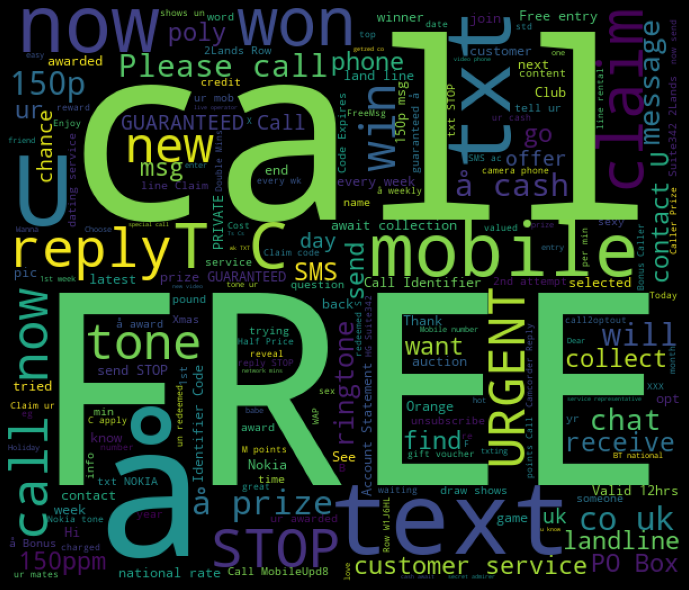

In [59]:
spam_words = ' '.join(list(spam[spam['num_label'] == 1]['text']))
spam_wc = WordCloud(width = 600,height = 512).generate(spam_words)
plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

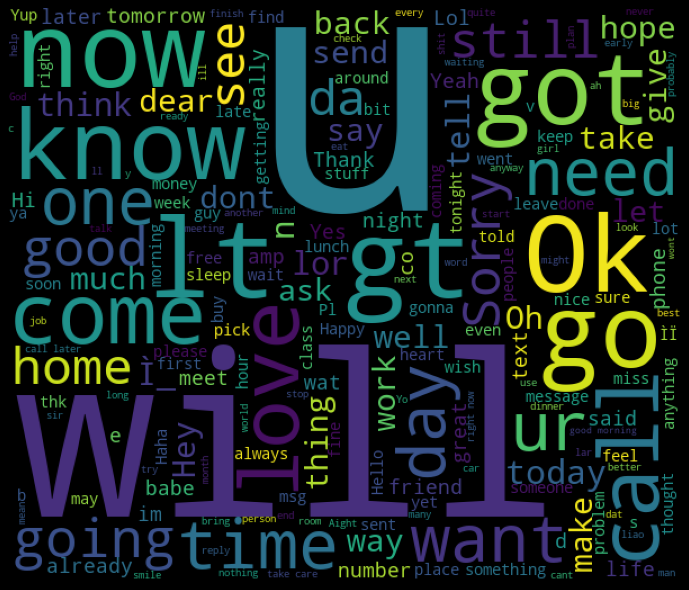

In [62]:
real_words = ' '.join(list(spam[spam['num_label'] == 0]['text']))
real_wc = WordCloud(width = 600,height = 512).generate(real_words)
plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(real_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [171]:
from nltk import FreqDist
spam_token = nltk.tokenize.word_tokenize(spam_words)
spam_freq = FreqDist(spam_token)
spam_freq

FreqDist({'.': 1004, 'to': 608, '!': 542, ',': 371, 'a': 358, 'you': 189, 'call': 187, 'your': 187, 'or': 185, '&': 178, ...})

In [173]:
spam_freq.most_common(5)

[('.', 1004), ('to', 608), ('!', 542), (',', 371), ('a', 358)]

# most common parts in the spam emails

In [143]:
FreqDist(spam_data_lemma).most_common(5)

[('private account statement show un redeemed point call identifier code expires',
  9),
 ('u secret admirer looking make contact u find r reveal think ur special call',
  6),
 ('urgent trying contact u today draw show prize guaranteed call land line claim valid hr',
  5),
 ('please call customer service representative freephone pm guaranteed cash prize',
  4),
 ('free st week nokia tone ur mob every week txt nokia get txting tell ur mate www getzed co uk pobox w wq norm p tone',
  4)]

# most common parts in the real emails

In [142]:
FreqDist(real_data_lemma).most_common(5)

[('sorry call later', 30),
 ('ok', 20),
 ('cant pick phone right pls send message', 12),
 ('', 8),
 ('okie', 7)]

# Pass the tokenized words to obtain a dispersion plot in the text

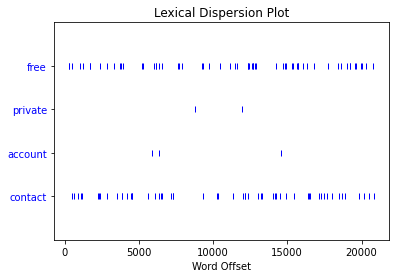

In [178]:
text1 = nltk.Text(spam_token)
text1.dispersion_plot(['free','private','account','contact'])

# create a model for the ML

In [197]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(all_data_lemma).toarray()
y = spam.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Let's try Naive Bayes Classifier

In [198]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [199]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rep = classification_report(y_test, y_pred)

# The report shows that the model is performing well on detecting hams but bad on spams.
# The precision for spams is ~0.38 indicating lots of false positives obtained from the model.
# Although the model accuracy is 0.79, it might be misleading,
# The recall for spam is high whereas the precision is low. This indicates that the model
# is biased towards spams. It is able to correctly identify all spams but also wrongly identified
# some hams as spams

In [200]:
print(rep)

              precision    recall  f1-score   support

         ham       0.98      0.77      0.86       968
        spam       0.38      0.92      0.53       147

    accuracy                           0.79      1115
   macro avg       0.68      0.84      0.70      1115
weighted avg       0.90      0.79      0.82      1115



# The confusion matrix also shows the similar scenario. The diagonal line does not have the 
# highest numbers. This means that the performance is not good enough for Naive Bayes. 

In [201]:
cm

array([[744, 224],
       [ 12, 135]], dtype=int64)

# Let's try Support Vector Classification

In [202]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [205]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rep = classification_report(y_test, y_pred)

# The model performance is good. Precision and recall for both ham and spam is high

In [206]:
print(rep)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       968
        spam       0.98      0.86      0.92       147

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Let's try Random Forest Classifier

In [207]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [208]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rep = classification_report(y_test, y_pred)

# The model performance is also good. Precision and rcall for both ham and spam is high

In [209]:
print(rep)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       968
        spam       1.00      0.90      0.95       147

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

